In [2]:
from keras.datasets import imdb
# IMDB 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# 정수 시퀀스를 이진 행렬로 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
# 모델 정의
from keras import models
from keras import layers

model = models.Sequential()
# 16개의 은닉유닛 가진 2개의 은닉층
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
# 현재 리뷰의 감정을 스칼라 값의 예측으로 출력
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
# 모델 컴파일
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [11]:
# 옵티마이저 설정
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy', 
              metrics=['accuracy'])

/Users/youngeun/miniforge3/envs/venv/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [12]:
# 검증 세트 준비 -> 원본 훈련 데이터에서 일부 떼어 검증세트로
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
# 모델 훈련
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

# model.fit() -> 훈련 동안 발생한 모든 정보 담은History 객체 반환,, 
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val)) # 검증 데이터 전달

Epoch 1/20


2022-03-14 14:40:47.137536: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-14 14:40:47.364342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 38ms/step - loss: 0.5175 - acc: 0.7971 - val_loss: 0.3894 - val_acc: 0.8707
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3686 - acc: 0.8906

2022-03-14 14:40:50.139126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 13ms/step - loss: 0.3109 - acc: 0.9033 - val_loss: 0.3084 - val_acc: 0.8866
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2231 - acc: 0.9286 - val_loss: 0.2822 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1783 - acc: 0.9419 - val_loss: 0.2795 - val_acc: 0.8878
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1420 - acc: 0.9570 - val_loss: 0.2822 - val_acc: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1168 - acc: 0.9644 - val_loss: 0.2936 - val_acc: 0.8840
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0953 - acc: 0.9723 - val_loss: 0.3218 - val_acc: 0.8808
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0806 - acc: 0.9769 - val_loss: 0.3335 - val_acc: 0.8812
Epoch 9/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0617 - acc: 0.9847 

In [14]:
history_dict = history.history

In [15]:
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


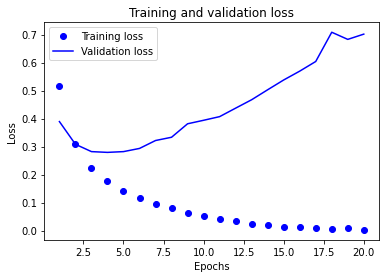

In [16]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

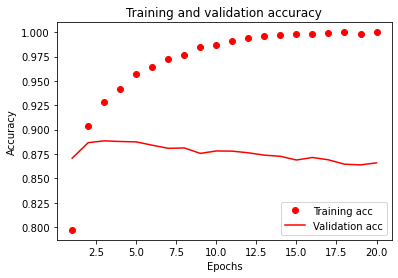

In [17]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [18]:
# 모델 처음부터 다시 훈련!
# epoch 횟수 4회로 감소(과대적합문제,,)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
 6/49 [==>...........................] - ETA: 0s - loss: 0.6511 - accuracy: 0.6566 

2022-03-14 14:41:10.128295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 9ms/step - loss: 0.4527 - accuracy: 0.8262
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2566 - accuracy: 0.9105
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.1981 - accuracy: 0.9287
Epoch 4/4
 29/782 [>.............................] - ETA: 2s - loss: 0.2667 - accuracy: 0.8933

2022-03-14 14:41:13.219101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.2927 - accuracy: 0.8850


In [19]:
results

[0.29274865984916687, 0.8850000500679016]

In [20]:
model.predict(x_test)

2022-03-14 14:41:20.664459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


array([[0.15901229],
       [0.99993265],
       [0.9040173 ],
       ...,
       [0.1256912 ],
       [0.06465019],
       [0.7493289 ]], dtype=float32)

In [21]:
model = models.Sequential()
# 은닉층 갯수 2->3개로 증가
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
 1/49 [..............................] - ETA: 17s - loss: 0.6938 - accuracy: 0.4980

2022-03-14 14:41:24.815784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 10ms/step - loss: 0.5338 - accuracy: 0.7716
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2915 - accuracy: 0.9052
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2087 - accuracy: 0.9276
Epoch 4/4
 27/782 [>.............................] - ETA: 3s - loss: 0.2739 - accuracy: 0.8889

2022-03-14 14:41:27.462327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.2984 - accuracy: 0.8834


[0.29843974113464355, 0.8833600282669067]

In [22]:
model = models.Sequential()
# 은닉층 갯수 2->1개로 감소
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
 6/49 [==>...........................] - ETA: 0s - loss: 0.6514 - accuracy: 0.6221 

2022-03-14 14:41:31.246609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 10ms/step - loss: 0.4621 - accuracy: 0.8254
Epoch 2/4
49/49 [==============================] - 0s 10ms/step - loss: 0.2874 - accuracy: 0.9044
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2244 - accuracy: 0.9249
Epoch 4/4
 28/782 [>.............................] - ETA: 2s - loss: 0.2600 - accuracy: 0.8917

2022-03-14 14:41:34.199034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.2789 - accuracy: 0.8892


[0.2788538336753845, 0.8891600370407104]

In [30]:
model = models.Sequential()
# 은닉유닛 16->32개 증가
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
 1/49 [..............................] - ETA: 15s - loss: 0.6988 - accuracy: 0.5176

2022-03-12 16:01:50.134473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 10ms/step - loss: 0.4514 - accuracy: 0.8052
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2449 - accuracy: 0.9118
Epoch 3/4
49/49 [==============================] - 0s 10ms/step - loss: 0.1937 - accuracy: 0.9305
Epoch 4/4
 27/782 [>.............................] - ETA: 3s - loss: 0.2877 - accuracy: 0.8831

2022-03-12 16:01:53.242237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.3124 - accuracy: 0.8792


[0.31242311000823975, 0.8792400360107422]

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse', #손실함수 binary_crossentropy -> mse
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
 1/49 [..............................] - ETA: 15s - loss: 0.2497 - accuracy: 0.5430

2022-03-12 16:02:45.391913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 8ms/step - loss: 0.1478 - accuracy: 0.8220
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0772 - accuracy: 0.9127
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0583 - accuracy: 0.9305
Epoch 4/4
 45/782 [>.............................] - ETA: 2s - loss: 0.0868 - accuracy: 0.8736

2022-03-12 16:02:47.878794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.0864 - accuracy: 0.8824


[0.08638216555118561, 0.8824000358581543]

In [32]:
model = models.Sequential()
# 활성화함수 relu -> tanh
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4


2022-03-12 16:03:37.554628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 1s 11ms/step - loss: 0.4219 - accuracy: 0.8369
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2321 - accuracy: 0.9160
Epoch 3/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1766 - accuracy: 0.9339
Epoch 4/4
 27/782 [>.............................] - ETA: 3s - loss: 0.2932 - accuracy: 0.8843

2022-03-12 16:03:40.864812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step - loss: 0.3241 - accuracy: 0.8774


[0.3241204023361206, 0.8774000406265259]